# Intro

This notebook is used to do a preliminary EDA (exploratory data analysis) in order to determine features of the data. These features include aspects such as the schema, field types and data quality

In [25]:
# import modules
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import stats

In [31]:
# Read in the data

ratings_df = pd.read_csv("/home/raelwilliamson/personal/movielens_analysis/data/raw/ratings.dat", sep="::")
movies_df = pd.read_csv("/home/raelwilliamson/personal/movielens_analysis/data/raw/movies.dat", sep="::", encoding='latin1')

# Show head of files

print(ratings_df.head(10))
print(movies_df.head(10))


/tmp/ipykernel_17877/1100171681.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings_df = pd.read_csv("/home/raelwilliamson/personal/movielens_analysis/eda/data/ratings.dat", sep="::")


   1  1193  5  978300760
0  1   661  3  978302109
1  1   914  3  978301968
2  1  3408  4  978300275
3  1  2355  5  978824291
4  1  1197  3  978302268
5  1  1287  5  978302039
6  1  2804  5  978300719
7  1   594  4  978302268
8  1   919  4  978301368
9  1   595  5  978824268
    1                    Toy Story (1995)   Animation|Children's|Comedy
0   2                      Jumanji (1995)  Adventure|Children's|Fantasy
1   3             Grumpier Old Men (1995)                Comedy|Romance
2   4            Waiting to Exhale (1995)                  Comedy|Drama
3   5  Father of the Bride Part II (1995)                        Comedy
4   6                         Heat (1995)         Action|Crime|Thriller
5   7                      Sabrina (1995)                Comedy|Romance
6   8                 Tom and Huck (1995)          Adventure|Children's
7   9                 Sudden Death (1995)                        Action
8  10                    GoldenEye (1995)     Action|Adventure|Thriller
9  11

/tmp/ipykernel_17877/1100171681.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies_df = pd.read_csv("/home/raelwilliamson/personal/movielens_analysis/eda/data/movies.dat", sep="::", encoding='latin1')


### Preliminary notes

We are able to load the data and see the fields and some sample data. Additionally, a read through of the dataset indicates the filed name (https://grouplens.org/datasets/movielens/). Thus, we know the schemas are: 

Rating: userId, movieId, rating, timestamp

Movies: movieId, title, genres

## Lets take a look at Ratings dataset:

In [22]:
# Lets add some headers
column_names = ['UserID', 'MovieID', 'Rating', 'Timestamp']
# Assign column names to the DataFrame
ratings_df.columns = column_names
# Lets cleanup the timestamp from UTX 
ratings_df['Date'] = pd.to_datetime(ratings_df['Timestamp'], unit='s').dt.date
print(ratings_df.head(10))
# Lets take a look at the stats:
summary_stats_ratings = ratings_df.describe()
print(summary_stats_ratings)


   UserID  MovieID  Rating  Timestamp        Date
0       1      661       3  978302109  2000-12-31
1       1      914       3  978301968  2000-12-31
2       1     3408       4  978300275  2000-12-31
3       1     2355       5  978824291  2001-01-06
4       1     1197       3  978302268  2000-12-31
5       1     1287       5  978302039  2000-12-31
6       1     2804       5  978300719  2000-12-31
7       1      594       4  978302268  2000-12-31
8       1      919       4  978301368  2000-12-31
9       1      595       5  978824268  2001-01-06
             UserID       MovieID        Rating     Timestamp
count  1.000208e+06  1.000208e+06  1.000208e+06  1.000208e+06
mean   3.024515e+03  1.865541e+03  3.581563e+00  9.722437e+08
std    1.728411e+03  1.096041e+03  1.117102e+00  1.215256e+07
min    1.000000e+00  1.000000e+00  1.000000e+00  9.567039e+08
25%    1.506000e+03  1.030000e+03  3.000000e+00  9.653026e+08
50%    3.070000e+03  1.835000e+03  4.000000e+00  9.730180e+08
75%    4.476000e

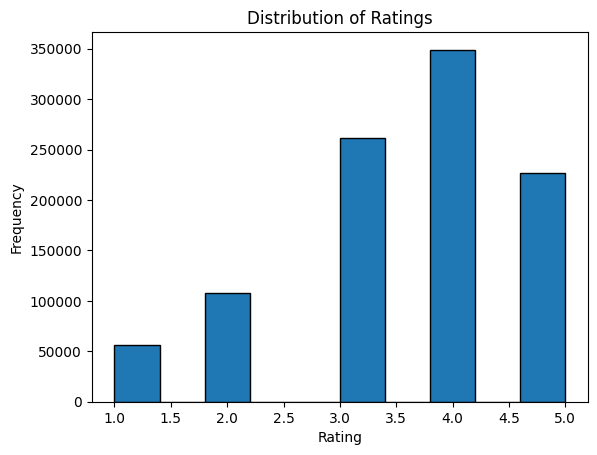

In [14]:
# Lets look at some graphs of the ratings
# Plot a histogram of ratings to visualize their distribution
plt.hist(ratings_df['Rating'], bins=10, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

In [26]:
# Lets take a look at the data quality

# Check for missing values in the DataFrame
print(ratings_df.isnull().sum())

# Lets check for any outliers
z_scores = stats.zscore(ratings_df[['Rating']])
threshold = 3
outliers = ratings_df[(z_scores > threshold).any(axis=1)]
print(outliers)


UserID       0
MovieID      0
Rating       0
Timestamp    0
Date         0
dtype: int64
Empty DataFrame
Columns: [UserID, MovieID, Rating, Timestamp, Date]
Index: []


### The following characteristics of the Ratings dataset have been noted:

- The timestamp is unix time and needs to be converted
- There are no null values
- There are no stastical outliers in Ratings
- The data is skewed towards higher ratings

Thus, for dating cleaning, only timestamp needs to be considered

## Lets take a look at the movies dataset

In [30]:
# Lets add some headers
column_names = ['MovieID', 'Title', 'Genre']
# Assign column names to the DataFrame
movies_df.columns = column_names
print(movies_df.head(10))

# Check for missing values in the DataFrame
print(movies_df.isnull().sum())

   MovieID                               Title                         Genre
0        2                      Jumanji (1995)  Adventure|Children's|Fantasy
1        3             Grumpier Old Men (1995)                Comedy|Romance
2        4            Waiting to Exhale (1995)                  Comedy|Drama
3        5  Father of the Bride Part II (1995)                        Comedy
4        6                         Heat (1995)         Action|Crime|Thriller
5        7                      Sabrina (1995)                Comedy|Romance
6        8                 Tom and Huck (1995)          Adventure|Children's
7        9                 Sudden Death (1995)                        Action
8       10                    GoldenEye (1995)     Action|Adventure|Thriller
9       11      American President, The (1995)          Comedy|Drama|Romance
MovieID    0
Title      0
Genre      0
dtype: int64


### The following characteristics of the Movies dataset have been noted:

- The data can be considered reference data (dimesion)
- There are no null values
- Genre is a combination of categories and could be considered for further cleaning

# Conclusions

Both the ratings and movie dataset are of decent quality for data engineering, although given the data charactersitcs may need further engineering for data science workloads. 

Thus, only small changes will be made for each datasets. These being:

- Add column headers
- Clean timestamp